# 堆栈知识点

---

## 1. 堆栈简介

> 堆栈是一种线性表数据结构，是一种只允许在表的一端进行插入和删除操作的线性表。而且是**后进先出（Last In First Out）**的线性表。

栈中允许插入和删除的一端为「栈顶（top）」；另一端称为「栈底（bottom）」。没有任何数据时，为「空栈」。

- 插入操作称为**入栈**；
- 删除操作称为**出栈**。

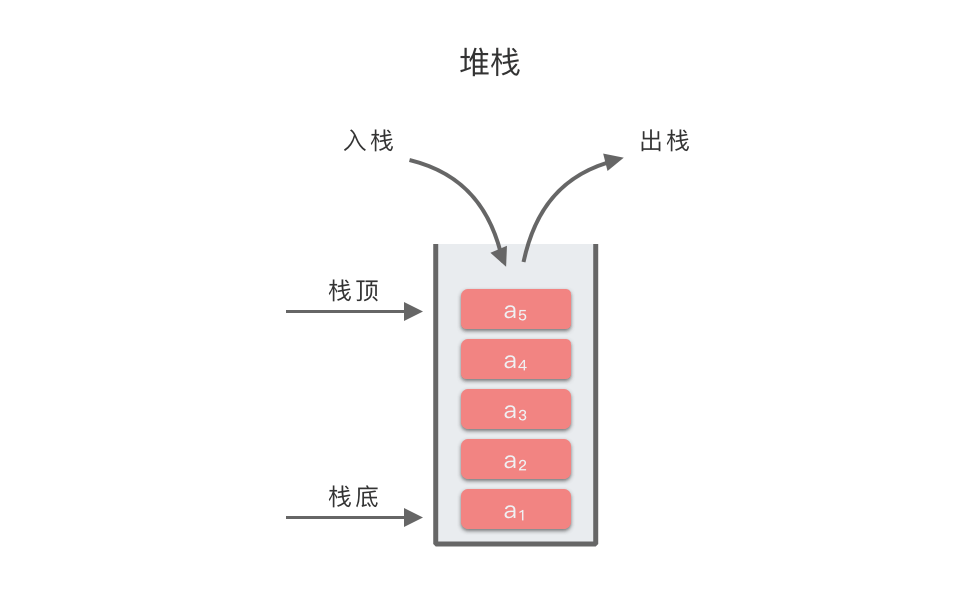

## 2. 堆栈的顺序存储和链式存储

和线性表类似，堆栈有两种存储表示方法：「顺序栈」 和 「链式栈」。
- 「顺序栈」：堆栈的顺序存储结构。利用一组地址连续的存储单元依次存放自栈底到栈顶的元素，同时使用指针$top$指示栈顶元素在顺序栈中的位置。
- 「链式栈」：堆栈的链式存储结构。利用单链表的方式来实现堆栈。栈中元素按照插入顺序依次插入到链表的第一个节点之前，并使用栈顶指针$top$指示栈顶元素，$top$指向链表的头节点位置。

### 2.1 堆栈的基本操作

栈作为一种线性表来说，理论上应该具备线性表所有的操作特性，但由于「后进先出」的特殊性，所以针对栈的操作进行了一些变化。尤其是插入操作和删除操作，改为了入栈（push）和出栈（pop）。

堆栈的基本操作如下：

- **初始化空栈**：创建一个空栈，定义栈的大小$size$，栈顶元素指针$top$。
- **判断栈是否为空**：当堆栈为空时，返回$True$。当堆栈不为空时，返回$False$。一般用于栈中删除操作与获取当前栈顶操作中。
- **判断栈是否已满**：当堆栈已满时，返回$True$。当堆栈未满时，返回$False$。一般用于栈中插入操作与获取当前栈顶操作中。
- **插入元素（进栈）**：相当于在线性表最后元素后面插入一个新的数据元素。并改变栈顶指针$top$的指向位置。
- **删除元素（出栈）**：相当于删除线性表最后一个数据元素。并改变栈顶指针$top$的指向位置。
- **获取栈顶元素**：相当于获取线性表最后一个数据元素。

### 2.2 堆栈的顺序存储实现

堆栈最简单的实现方式是借助一个数组来描述堆栈的顺序存储结构。在Python中可以借助列表实现。

#### 2.2.1 堆栈的顺序存储基本描述

约定$self.top$指向栈顶位置。
- **初始化空栈**：使用列表创建一个空栈，定义栈的大小$self.size$，令栈顶指针指向-1，$self.top=-1$。
- **判断栈是否为空**：当$self.top==-1$时，堆栈是空的，返回$True$，否则返回$False$。
- **判断栈是否已满**：当$self.top==self.size-1$时，堆栈已满，返回$True$，否则返回$False$。
- **入栈**：先判断栈是否已满，已满抛出异常。未满的话在$self.stack$末尾添加新的数据元素，并令$self.top$右移一位。
- **出栈**：先判断栈是否为空，为空抛出异常。不为空则删除$self.stack$末尾元素，并令$self.top$左移一位。
- **查看栈顶元素**：先判断堆栈是否为空，为空直接抛出异常。不为空则返回$slef.stack[self.top]$。 

#### 2.2.2 堆栈的顺序存储实现代码

In [ ]:
class Stack:
    # 初始化空栈
    def __init__(self, size=100):
        self.stack = []
        self.top = -1
        self.size = size
        
    # 判断堆栈是否为空
    def is_empty(self):
        return self.top == -1
    
    # 判断堆栈是否已满
    def is_full(self):
        return self.top == self.size - 1
    
    # 入栈
    def push(self, elem):
        if self.is_full():
            raise Exception("Stack is full")
        else:
            self.stack.append(elem)
            self.top += 1
            
    # 出栈
    def pull(self):
        if self.is_empty():
            raise Exception("Stack is empty")
        else:
            self.stack.pop()
            self.top -= 1
            
    # 获取栈顶元素
    def get_top(self):
        if self.is_empty():
            raise Exception("Stack is empty")
        else:
            return self.stack[self.top]

### 2.3 堆栈的链式存储实现

**链式栈**通过构建链表节点$Node$实现。

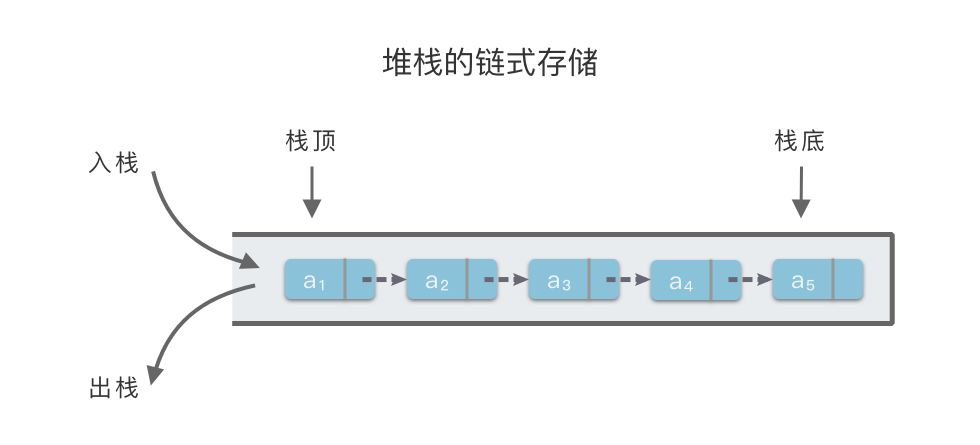

#### 2.3.1 链式栈基本描述

约定$self.top$指向栈顶位置。
- **初始化空栈**：使用链节点Node创建一个空栈，令栈顶指针指向$None$，$self.top=None$。
- **判断栈是否为空**：当$self.top==None$时，堆栈是空的，返回$True$，否则返回$False$。
- **入栈**：创建值为$value$的链节点，插入到链表头节点之前，并令$self.top$指向新的头节点。
- **出栈**：先判断栈是否为空，为空抛出异常。不为空则删除用指针$cur$储存当前头节点，令$self.top$沿链表移动一位，再删除之前保存的$cur$节点。
- **查看栈顶元素**：先判断堆栈是否为空，为空直接抛出异常。不为空则返回当前链表头节点的值即$self.top.value$。 

#### 2.3.2 链式栈代码实现

In [ ]:
class Node:
    def __init__(self, val=0):
        self.val = val
        self.next = None
        
class LinkedStack:
    # 初始化空栈
    def __init__(self):
        self.top = None
        
    # 判断堆栈是否为空
    def is_empty(self):
        return self.top == None
    
    # 入栈
    def push(self, value):
        newNode = Node(value)
        newNode.next = self.top
        self.top = newNode
        
    # 出栈
    def pull(self):
        if self.is_empty():
            raise Exception('Stack is empty')
        else:
            cur = self.top
            self.top = self.top.next
            del cur

    # 获取栈顶元素
    def get_top(self):
        if self.is_empty():
            raise Exception('Stack is empty')
        else:
            return self.top.val

## 3. 堆栈应用

堆栈是算法和程序中最常用的辅助结构，其应用十分广泛。堆栈基本应用于两个方面：
- 使用堆栈可以很方便的保存和取用信息，因此长被用作算法和程序中的辅助存储结构，临时保存信息，供后面操作中使用。
    - 例如：操作系统中的函数调用栈，浏览器中的前进、后退功能。
- 堆栈的后进先出规则，可以保证特定的存取顺序。
    - 例如：翻转一组元素的顺序、铁路列车车辆调度。

下面我们来讲解一下栈应用的典型例子。

### 3.1 括号匹配问题

题目链接：[20. 有效的括号-力扣（LeetCode）](https://leetcode.cn/problems/valid-parentheses/description/)

个人题解：[20有效的括号](20有效括号.py)

### 3.2 表达式求值问题

题目链接：[227. 基本计算器 II - 力扣（LeetCode）](https://leetcode.cn/problems/basic-calculator-ii/description/)

个人题解：[227基本计算器II](227.基本计算器%20II.py)